# importing the libraries

In [1]:
import math
import pandas as pd
import numpy as np
from time import time
from functools import reduce
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
def ETL (file):
    print('-'*65)
    print('se realiza la carga de la base de datos a un objeto data frame')
    df= file #pd.read_table(file)  #pd.read_pickle(Direccion + nombreBd)
    print("RevisiÃ³n de los datos(NÃºmero de Variables, NÃºmero de registros)")
    print('NÃºmero de variables: {0}'.format(df.shape[1]))
    print('NÃºmero de registros: {0}'.format(df.shape[0]))
    print('-'*65)
    print("revisiÃ³n de las variables que posee la base de datos ")
    print(list(df.columns.values))
    print('-'*65)
    print("Resumen descriptivo de las variables ")
    print(df.describe())
    print('-'*65)
    print('Revision del tipo de variables que contiene la base de datos')
    print(pd.DataFrame(df.dtypes,columns=['Tipo de variable']))
    print('-'*65)
    print("Se realiza una revisiÃ³n si existen datos N/A")
    revisionNull(df)
    print('-'*65)
    print('SelecciÃ³n de variables, en este paso lo que se realiza es la organizaciÃ³n de las variables, para trabajar con las variables categoricas a parte y las numericas ')
    var_categoricas = list(df.select_dtypes(include=['object']).columns)
    var_numericas = list(df.select_dtypes(exclude=['object']).columns)
    print('-'*65)
    print('Reporte de los niveles que puede tener cada una de las variables categoricas')
    for variable in var_categoricas:
        print("\033[1m",variable,":","\033[0;0m",df[variable].unique())
    print(80*'-')
    for variabl in  var_numericas:
        print("--"*30,variabl)
        #plt.cla()
        x = df[variabl].sort_values(ascending = False).reset_index()
        x[variabl].plot()
        #plt.plot(df[variabl].sort_values())    
        plt.show()
        plt.boxplot(x[variabl])
        plt.show()
        plt.close()

    
def revisionNull(df):
    a=df.isnull().sum()
    resulNa=[ re for re in a if re>0 ]
    if resulNa:
        print(resulNa)
        
    else :
        print("No existen valores con NA o null")
                

Steps:

1) read the data set

2) explore the data set -> Statistical analysis to numerical and categorical data

3) select the variables taht will be used fot the model

4) split the data for train and test

5) train the model (RF)  *the model is a forecasting model of customers desertion

6) test the model: obtain the desertion probability of new customers

7) ROC curve

# reading the data set

In [3]:
dir_input = r"C:\Users\Usuario\OneDrive - Idata\IDATA\Aprendiendo_python\Kaggle\Telco-customer-churn"
os.listdir(dir_input)

['.ipynb_checkpoints',
 'Model.ipynb',
 'telco-customer-churn.zip',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [22]:
file = os.path.join(dir_input,'WA_Fn-UseC_-Telco-Customer-Churn.csv') 
data = pd.read_csv(file, error_bad_lines=False)

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Explore the data set

-----------------------------------------------------------------
se realiza la carga de la base de datos a un objeto data frame
RevisiÃ³n de los datos(NÃºmero de Variables, NÃºmero de registros)
NÃºmero de variables: 21
NÃºmero de registros: 7043
-----------------------------------------------------------------
revisiÃ³n de las variables que posee la base de datos 
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
-----------------------------------------------------------------
Resumen descriptivo de las variables 
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min

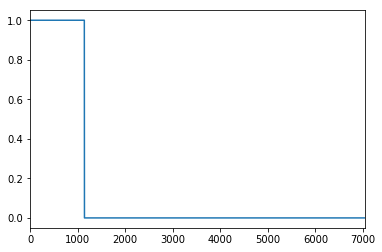

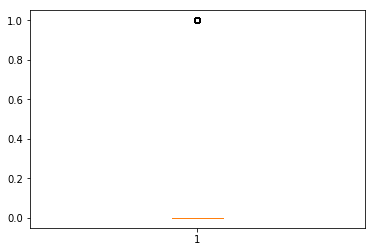

------------------------------------------------------------ tenure


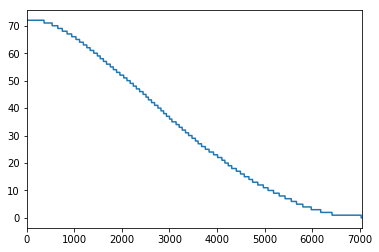

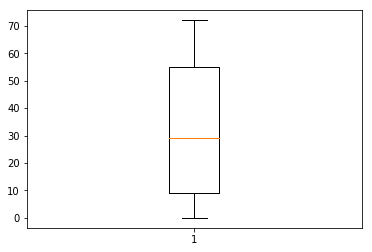

------------------------------------------------------------ MonthlyCharges


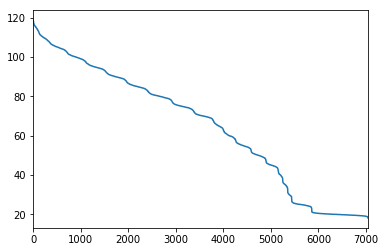

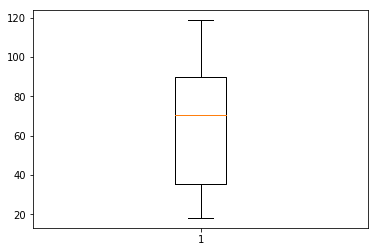

In [6]:
ETL(data)

# Correlation analysis

In [7]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# selecting the features columns that are relevant for the model

In [23]:
# In order to predict the probably that a customer left the company the varibles that has more relevant features are: 
# customer_ID, tenure, PhoneService , InternetService , Contract , MonthlyCharges, TotalCharges, Churn

model_data = data[['customerID', 'PhoneService', 'InternetService', 'tenure', 'MonthlyCharges', 'Churn']]
model_data.head()

,customerID,PhoneService,InternetService,tenure,MonthlyCharges,Churn
0,7590-VHVEG,No,DSL,1,29.85,No
1,5575-GNVDE,Yes,DSL,34,56.95,No
2,3668-QPYBK,Yes,DSL,2,53.85,Yes
3,7795-CFOCW,No,DSL,45,42.30,No
4,9237-HQITU,Yes,Fiber optic,2,70.70,Yes


In [ ]:
#converting to numeric in pandas approach
# model_data["PhoneService"] = np.where(model_data["PhoneService"].str.contains("Yes"), 1, 0)
# model_data["Churn"] = np.where(model_data["Churn"].str.contains("Yes"), 1, 0)

In [24]:
#converting to numeric using scikit-learn
lb_make = LabelEncoder()
model_data["PhoneService"] = lb_make.fit_transform(model_data["PhoneService"])
model_data["Churn"] = lb_make.fit_transform(model_data["Churn"])

In [25]:
model_data.head()

,customerID,PhoneService,InternetService,tenure,MonthlyCharges,Churn
0,7590-VHVEG,0,DSL,1,29.85,0
1,5575-GNVDE,1,DSL,34,56.95,0
2,3668-QPYBK,1,DSL,2,53.85,1
3,7795-CFOCW,0,DSL,45,42.30,0
4,9237-HQITU,1,Fiber optic,2,70.70,1


In [26]:
# converting 'InternetService' column into discrete columns containing indicator variables, sometimes known as "dummy" variables
model_data= pd.get_dummies(model_data, columns=['InternetService'])
model_data.head()

,customerID,PhoneService,tenure,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,29.85,0,1,0,0
1,5575-GNVDE,1,34,56.95,0,1,0,0
2,3668-QPYBK,1,2,53.85,1,1,0,0
3,7795-CFOCW,0,45,42.30,0,1,0,0
4,9237-HQITU,1,2,70.70,1,0,1,0


# Splitting the dataset

DataFrame into a training set containing 80% of the original data, and a test set containing the remaining 20%
The random_state parameter seeds the random-number generator used to do the splitting, while the first and second parameters are DataFrames containing the feature columns and the label column.


In [27]:
train_x, test_x, train_y, test_y = train_test_split(model_data.drop('Churn', axis=1), model_data['Churn'], test_size=0.2, random_state=42)

In [28]:
train_x.shape

(5634, 7)

In [29]:
test_x.shape

(1409, 7)

In [30]:
train_x.head()

,customerID,PhoneService,tenure,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2142,4223-BKEOR,1,21,64.85,1,0,0
1623,6035-RIIOM,1,54,97.20,0,1,0
6074,3797-VTIDR,0,1,23.45,1,0,0
1362,2568-BRGYX,1,4,70.20,0,1,0
6754,2775-SEFEE,1,0,61.90,1,0,0


In [31]:
# erasing the ID column in both data sets
train_x = train_x.drop(['customerID'], axis=1)
test_x = test_x.drop(['customerID'], axis=1)
print(train_x.columns.values)
print(test_x.columns.values)

['PhoneService' 'tenure' 'MonthlyCharges' 'InternetService_DSL'
 'InternetService_Fiber optic' 'InternetService_No']
['PhoneService' 'tenure' 'MonthlyCharges' 'InternetService_DSL'
 'InternetService_Fiber optic' 'InternetService_No']


# Build Machine Learning Model

Your model will be a binary classification model that predicts whether a flight will arrive on-time or late ("binary" because there are only two possible outputs).

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [33]:
# determine the mean accuracy of the model:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7565649396735273

The mean accuracy is 76%, which seems good on the surface. However, mean accuracy isn't always a reliable indicator of the accuracy of a classification model. Let's dig a little deeper and determine how accurate the model really is — that is, how adept it is at determining whether a flight will arrive on time.



# ROC CURVE

Before you compute the ROC AUC, you must generate prediction probabilities for the test set. These probabilities are estimates for each of the classes, or answers, the model can predict. For example, [0.88199435, 0.11800565] means that there's an 89% chance that a customer don't deserting the company and a 12% chance that it won't (Churn = 1). The sum of the two probabilities adds up to 100%.

In [34]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [35]:
#ROC CURVE OVER THE PROBABILITIES
# predict Churn = 1
stay_out = roc_auc_score(test_y, probabilities[:, 1])
stay_out

0.7519343836367965

In [36]:
# predict Churn = 0
stay_in = roc_auc_score(test_y, probabilities[:, 0])
stay_in

0.24809796391565825

In [37]:
total_proability = stay_in + stay_out
total_proability

1.0000323475524548

# CONFUSION MATRIX

The confusion matrix quantifies the number of times each answer was classified correctly or incorrectly. Specifically, it quantifies the number of false positives, false negatives, true positives, and true negatives. This is important, because if a binary classification model trained to recognize cats and dogs is tested with a dataset that is 95% dogs, it could score 95% simply by guessing "dog" every time. But if it failed to identify cats at all, it would be of little value.

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[894, 142],
       [201, 172]], dtype=int64)

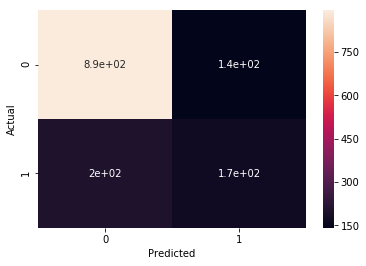

In [39]:
import seaborn as sn

confusion_matrix = pd.crosstab(test_y, predicted, rownames=['Actual'], colnames=['Predicted'])


sn.heatmap(confusion_matrix, annot=True)

Other measures of accuracy for a classification model include precision and recall.

In [43]:
from sklearn.metrics import precision_score
train_predictions = model.predict(train_x)
print("The precision: ",precision_score(train_y, train_predictions)) # TP / (TP + FP)

The precision:  0.9547088425593099


In [44]:
from sklearn.metrics import recall_score

print("The recall: ",recall_score(train_y, train_predictions))  # TP / (TP + FN)

The recall:  0.8877005347593583


In [45]:
def predict_delay(PhoneService, tenure, MonthlyCharges, InternetService, InternetService_DSL):
   
    input = [{'PhoneService': PhoneService,
              'tenure': tenure,
              'MonthlyCharges': MonthlyCharges,
              'InternetService_DSL': InternetService_DSL,
              'InternetService_Fiber optic': 1 if InternetService_DSL == 0 else 0,
              'InternetService_No': 0 if InternetService == 1 else 1}]

    return model.predict_proba(pd.DataFrame(input))[0][0]

Use the code below to compute the probability that a customer desert using the next of variables 


In [46]:
PhoneService = 1
tenure = 12.35
MonthlyCharges = 2 * tenure
InternetService = 1
InternetService_DSL = 0 

predict_delay(PhoneService, tenure, MonthlyCharges, InternetService, InternetService_DSL)


0.6333333333333333